# **Practice Project Overview: Fruit Classification Using Transfer Learning**

Estimated Reading Time: 15 minutes

## **Project Overview**

In this practice project, you will learn to classify images of fruits into different categories using transfer learning. The pre-trained VGG16 model will be used as the base, and custom layers will be added to fine-tune the model for our specific task. This approach allows us to leverage the knowledge learned from a large dataset (ImageNet) and apply it to a smaller, custom dataset with minimal computational resources and data.

## **Aim**

The aim is to classify images of different fruits using a machine learning model. You will train a convolutional neural network (CNN) to recognize various fruit categories using the power of transfer learning with a pre-trained model.

## **Final Output**

A trained model capable of classifying fruit images into specified categories with good accuracy.

## **Learning objectives**

After completing this project, you will be able to:

- Prepare data into a directory structure
- Create sample images
- Verify the directory structure and images
- Set up the data generator
- Build and compile the model
- Train and evaluate the model using callbacks
- Plot and visualize the model

## **Prerequisites**

- Basic knowledge of Python and Keras
- TensorFlow installed in your Python environment
- A dataset of fruit images organized in subdirectories for each class

## **Instructions**

You need to perform the following tasks to complete the project after preparing the data:

- Task 1: Print the version of TensorFlow
- Task 2: Create a test generator using the test_datagen object
- Task 3: Print the length of the train generator
- Task 4: Print the summary of the model
- Task 5: Compile the model
- Task 6: Plot accuracy curves for training and validation sets
- Task 7: Plot loss curves for training and validation sets (fine-tuned model)
- Task 8: Plot accuracy curves for training and validation sets (fine-tuned model)
- Task 9: Plot a test image using the Extract Features Model
- Task 10: Plot a test image using the Fine-Tuned Model

## **Key Takeaways**

Transfer learning enables leveraging pre-trained models for custom tasks with limited data.
Data augmentation helps improve model generalization on small datasets.
Let's start this guided project and train a convolutional neural network (CNN) to recognize various fruit categories using the power of transfer learning with a pre-trained model.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Print the version of tensorflow
print(tf.__version__)

2.18.0


In [3]:
# Download the dataset
import os
import subprocess
import zipfile

# Define dataset URL and paths
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/4yIRGlIpNfKEGJYMhZV52g/fruits-360-original-size.zip"
local_zip = "data/fruits-360-original-size.zip"
extract_dir = "data/fruits-360-original-size"

def download_dataset(url, output_file):
    """Download the dataset using wget in quiet mode."""
    print("Downloading the dataset...")
    subprocess.run(["wget", "-q", "-O", output_file, url], check=True)  # Add `-q` for quiet mode
    print("Download completed.")

def extract_zip_in_chunks(zip_file, extract_to, batch_size=2000):
    """
    Extract a large zip file in chunks to avoid memory bottlenecks.
    Processes a specified number of files (batch_size) at a time.
    """
    print("Extracting the dataset in chunks...")
    os.makedirs(extract_to, exist_ok=True)  # Ensure the extraction directory exists
    
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        files = zip_ref.namelist()  # List all files in the archive
        total_files = len(files)
        
        for i in range(0, total_files, batch_size):
            batch = files[i:i+batch_size]
            for file in batch:
                zip_ref.extract(file, extract_to)  # Extract each file in the batch
            print(f"Extracted {min(i+batch_size, total_files)} of {total_files} files...")
    
    print(f"Dataset successfully extracted to '{extract_to}'.")

# Main script execution
if __name__ == "__main__":
    # Download the dataset if not already downloaded
    if os.path.exists(local_zip):
        download_dataset(url, local_zip)
    else:
        print("Dataset already downloaded.")
    
    # Extract the dataset if not already extracted
    if not os.path.exists(extract_dir):
        extract_zip_in_chunks(local_zip, extract_dir)
    else:
        print("Dataset already extracted.")
    
    # Optional cleanup of the zip file
    if os.path.exists(local_zip):
        os.remove(local_zip)
        print(f"Cleaned up zip file: {local_zip}")


Dataset already downloaded.
Dataset already extracted.


In [4]:
# Set dataset paths
train_dir = 'data/fruits-360-original-size/fruits-360-original-size/Training'
validation_dir = 'data/fruits-360-original-size/fruits-360-original-size/Training'
test_dir = 'data/fruits-360-original-size/fruits-360-original-size/Training'

In [5]:
# Set up data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 6231 images belonging to 24 classes.
Found 6231 images belonging to 24 classes.
Found 6231 images belonging to 24 classes.


In [6]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,853,208 (56.66 MB)

 Trainable params: 138,008 (539.09 KB)

 Non-trainable params: 14,715,200 (56.13 MB)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.mixed_precision import set_global_policy

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', 
                                 factor=0.2, 
                                 patience=3, 
                                 min_lr=1e-6,
                                 verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               verbose=1)

set_global_policy('mixed_float16')

steps_per_epoch = 50
validation_steps = 25

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    validation_data=val_generator,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

d:\Coding\ibm-ai-engineering\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 411ms/step - accuracy: 0.1672 - loss: 3.0896 - val_accuracy: 0.2650 - val_loss: 2.5681 - learning_rate: 0.0010
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 325ms/step - accuracy: 0.6096 - loss: 1.3722 - val_accuracy: 0.3887 - val_loss: 2.0876 - learning_rate: 0.0010
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 285ms/step - accuracy: 0.7076 - loss: 0.9461 - val_accuracy: 0.6888 - val_loss: 1.4593 - learning_rate: 0.0010
Epoch 4/5
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.7849 - loss: 0.7344

d:\Coding\ibm-ai-engineering\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.7838 - loss: 0.7344 - val_accuracy: 0.7450 - val_loss: 1.1844 - learning_rate: 0.0010
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.7620 - loss: 0.7441 - val_accuracy: 0.8550 - val_loss: 0.8087 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.


In [9]:
# Fine-tune the model by unfreezing the base model
from tensorflow.keras.optimizers import Adam

num_layers = len(base_model.layers)
print(f"Number of layers in the base model: {num_layers}")

# Unfreeze the last 5 layers
for layer in base_model.layers[-5:]:
    layer.trainable = True
    
# Freeze the batch normalization layers
for layer in base_model.layers:
    if "batch_normalization" in layer.name:
        layer.trainable = False
    
# Re-compile the model with a faster initial learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Number of layers in the base model: 19


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,853,208 (56.66 MB)

 Trainable params: 7,217,432 (27.53 MB)

 Non-trainable params: 7,635,776 (29.13 MB)

In [10]:
history_fine = model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    validation_data=val_generator,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 269ms/step - accuracy: 0.8612 - loss: 0.4888 - val_accuracy: 0.8363 - val_loss: 0.6131 - learning_rate: 1.0000e-05
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 241ms/step - accuracy: 0.8782 - loss: 0.4328 - val_accuracy: 0.8487 - val_loss: 0.4834 - learning_rate: 1.0000e-05
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - accuracy: 0.8904 - loss: 0.3764 - val_accuracy: 0.9150 - val_loss: 0.3399 - learning_rate: 1.0000e-05
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.9135 - loss: 0.3205 - val_accuracy: 0.9375 - val_loss: 0.2586 - learning_rate: 1.0000e-05
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 237ms/step - accuracy: 0.9241 - loss: 0.3044 - val_accuracy: 0.9625 - val_loss: 0.1953 - learning_rate: 1.0000e-05
Restoring model weights from the end of the best epoch: 5.


In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_accuracy:.3f}")

195/195 ━━━━━━━━━━━━━━━━━━━━ 24s 122ms/step - accuracy: 0.9727 - loss: 0.1830
Test accuracy: 0.969


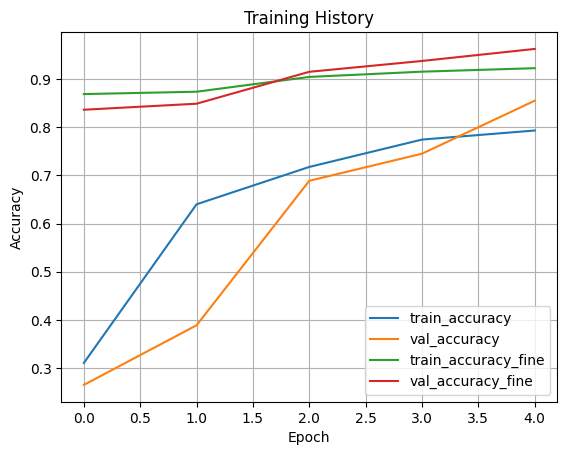

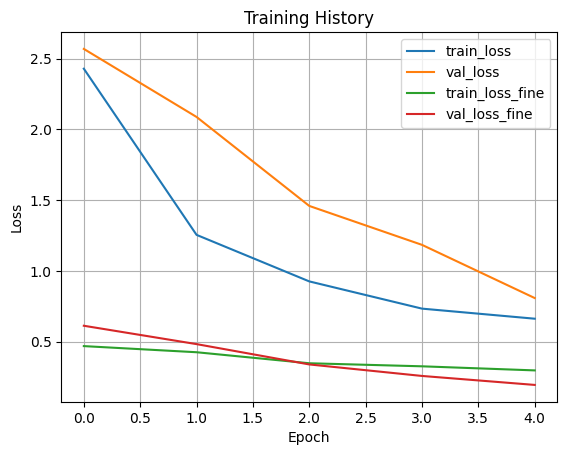

In [12]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history_fine.history['accuracy'], label='train_accuracy_fine')
plt.plot(history_fine.history['val_accuracy'], label='val_accuracy_fine')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history_fine.history['loss'], label='train_loss_fine')
plt.plot(history_fine.history['val_loss'], label='val_loss_fine')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Found 3110 images belonging to 24 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


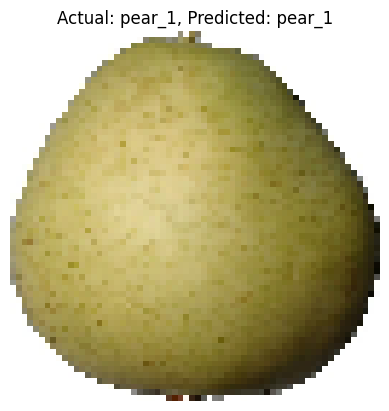

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


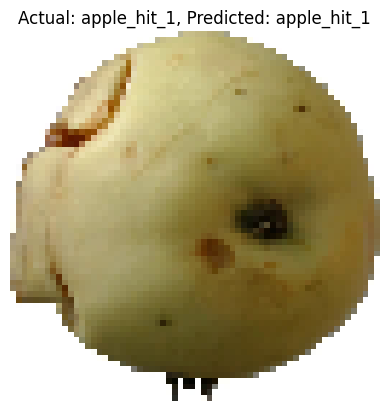

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


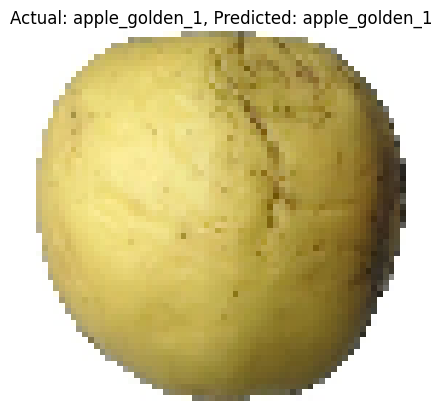

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


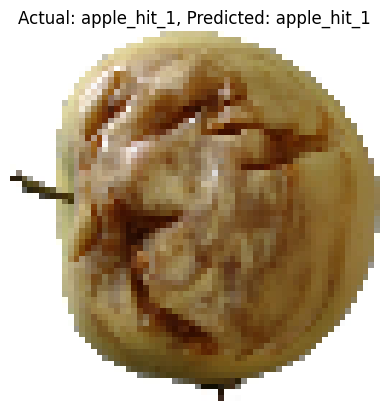

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


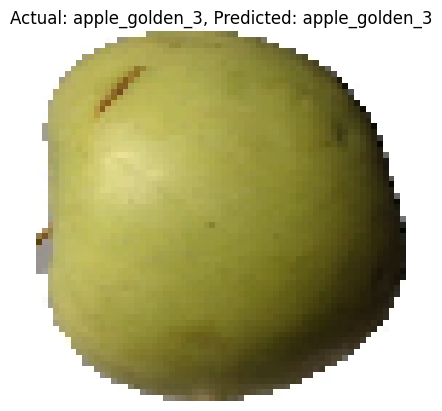

In [14]:
import os
import numpy as np
from collections import Counter
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Initialize counters for actual and predicted classes
actual_count = Counter()
predicted_count = Counter()

def get_class_from_index(predicted_idx, generator):
    """Get the class label from the class index."""
    for class_label, class_index in generator.class_indices.items():
        if class_index == predicted_idx:
            return class_label
    return "Unknown"

def visualizer(img_path, generator, model):
    """Visualize the predictions for a single image."""
    # Load and preprocess the image
    img = load_img(img_path, target_size=(64, 64))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Get the actual class label
    actual_class = os.path.basename(os.path.dirname(img_path))
    actual_count[actual_class] += 1
    
    # Get the predicted class label
    prediction = model.predict(img_array)
    predicted_class_idx = np.argmax(prediction)
    predicted_class = get_class_from_index(predicted_class_idx, generator)
    predicted_count[predicted_class] += 1
    
    # Display the image and the predicted class
    plt.imshow(img)
    plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# Get random images from the test set
test_dir = 'data/fruits-360-original-size/fruits-360-original-size/Test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=1,
    class_mode='categorical',
    shuffle=True
)

for _ in range(5):
    img_path = test_generator.filepaths[np.random.randint(len(test_generator.filepaths))]
    visualizer(img_path, test_generator, model)